<h1 align = "center">Boilerplate/Template Design</h1>

---


**Objective:** The file provides a simple *boilerplate* to concentrate on what is necessary, and stop doing same tasks! The boilerplate is also configured with certain [**nbextensions**](https://gitlab.com/ZenithClown/computer-configurations-and-setups) that I personally use. Install them, if required, else ignore them as they do not participate in any type of code-optimizations. For any new project *edit* this file or `File > Make a Copy` to get started with the project. Some settings and configurations are already provided, as mentioned below.

In [1]:
# use the code release version for tracking and code modifications. use the
# CHANGELOG.md file to keep track of version features, and/or release notes.
# the version file is avaiable at project root directory, check the
# global configuration setting for root directory information.
# the file is already read and is available as `__version__`
__version__ = open("../VERSION", "rt").read() # bump codecov
print(f"Current Code Version: {__version__}") # TODO : author, contact

Current Code Version: 


## Code Imports

A code must be written such that it is always _production ready_. The conventional guidelines provided under [**PEP8**](https://peps.python.org/pep-0008/#imports) defines the conventional or syntactically useful ways of defining and/or manipulating functions. Necessar guidelines w.r.t. code imports are mentioned below, and basic libraries and import settings are defined.

 1. Imports should be on separate lines,
 2. Import order should be:
    * standard library/modules,
    * related third party imports,
    * local application/user defined imports
 3. Wildcard import (`*`) should be avoided, else specifically tagged with **`# noqa: F403`** as per `flake8` or **`# pylint: disable=unused-import`** as per `pylint`
 4. Avoid using relative imports; use explicit imports instead.

In [2]:
import os   # miscellaneous os interfaces
import sys  # configuring python runtime environment
import time # library for time manipulation, and logging

In [3]:
# use `datetime` to control and preceive the environment
# in addition `pandas` also provides date time functionalities
import datetime as dt

In [4]:
from copy import deepcopy      # dataframe is mutable
from tqdm import tqdm as TQ    # progress bar for loops
# from uuid import uuid4 as UUID # unique identifier for objs

[**`logging`**](https://docs.python.org/3/howto/logging.html) is a standard python module that is meant for tracking any events that happen during any software/code operations. This module is super powerful and helpful for code debugging and other purposes. The next section defines a `logging` configuration in **`../logs/`** directory. Modify the **`LOGS_DIR`** variable under *Global Arguments* to change the default directory. The module is configured with a simplistic approach, such that any `print())` statement can be update to `logging.LEVEL_NAME()` and the code will work. Use logging operations like:

```python
 >> logging.debug("This is a Debug Message.")
 >> logging.info("This is a Information Message.")
 >> logging.warning("This is a Warning Message.")
 >> logging.error("This is a ERROR Message.")
 >> logging.critical("This is a CRITICAL Message.")
```

Note: some directories related to logging is created by default. This can be updated/changed in the following configuration section.

In [ ]:
import logging # configure logging on `global arguments` section, as file path is required

### Data Analysis and AI/ML Libraries

Import of data analysis and AI/ML libraries required at different intersections. Check settings and configurations [here](https://gitlab.com/ZenithClown/computer-configurations-and-setups) and code snippets [here](https://gitlab.com/ZenithClown/computer-configurations-and-setups/-/tree/master/template/snippets/vscode) for understanding settings that is used in this notebook. The code uses `matplotlib.styles` which is a custom `.mplstyle` file recognised by the `matplotlib` downlodable from [this link](https://gitlab.com/ZenithClown/computer-configurations-and-setups/-/tree/master/settings/python/matplotlib).

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style');

pd.set_option('display.max_rows', 50) # max. rows to show
pd.set_option('display.max_columns', 15) # max. cols to show
np.set_printoptions(precision = 3, threshold = 15) # set np options
pd.options.display.float_format = '{:,.2f}'.format # float precisions

In [6]:
from sklearn.metrics import (
    mean_squared_error as MSE,
    mean_absolute_error as MAE
)

In [7]:
import tensorflow as tf
print(f"Tensorflow Version: {tf.__version__}", end = "\n\n") # required >= 2.8

# check physical devices, and gpu compute capability (if available)
if len(tf.config.list_physical_devices(device_type = "GPU")):
    # https://stackoverflow.com/q/38009682/6623589
    # https://stackoverflow.com/a/59179238/6623589
    print("GPU Computing Available.", end = " ")
    
    # experimentally, get the gpu details and computation power
    # https://www.tensorflow.org/api_docs/python/tf/config/experimental/get_device_details
    devices = tf.config.list_physical_devices(device_type = "GPU")[0] # first
    details = tf.config.experimental.get_device_details(devices) # only first
    details.get('device_name', 'compute_capability')
    print(f"EXPERIMENTAL : {details}")
else:
    print("GPU Computing Not Available. If `GPU` is present, check configuration. Detected Devices:")
    print("  > ", tf.config.list_physical_devices())

Tensorflow Version: 2.9.0

GPU Computing Available. EXPERIMENTAL : {'device_name': 'NVIDIA GeForce GTX 1650', 'compute_capability': (7, 5)}


### User Defined Function(s)

It is recommended that any UDFs are defined outside the scope of the *jupyter notebook* such that development/editing of function can be done more practically. As per *programming guidelines* as [`src`](https://fileinfo.com/extension/src) file/directory is beneficial in code development and/or production release. However, *jupyter notebook* requires *kernel restart* if any imported code file is changed in disc, for this frequently changing functions can be defined in this section.

**Getting Started** with **`PYTHONPATH`**

One must know what are [Environment Variable](https://medium.com/chingu/an-introduction-to-environment-variables-and-how-to-use-them-f602f66d15fa) and how to call/use them in your choice of programming language. Note that an environment variable is *case sensitive* in all operating systems (except windows, since DOS is not case sensitive). Generally, we can access environment variables from terminal/shell/command prompt as:

```shell
# macOS/*nix
echo $VARNAME

# windows
echo %VARNAME%
```

Once you've setup your system with [`PYTHONPATH`](https://bic-berkeley.github.io/psych-214-fall-2016/using_pythonpath.html) as per [*python documentation*](https://docs.python.org/3/using/cmdline.html#envvar-PYTHONPATH) is an important directory where any `import` statements looks for based on their order of importance. If a source code/module is not available check necessary environment variables and/or ask the administrator for the source files. For testing purpose, the module boasts the use of `src`, `utils` and `config` directories. However, these directories are available at `ROOT` level, and thus using `sys.path.append()` to add directories while importing.

In [8]:
# append `src` and sub-modules to call additional files these directory are
# project specific and not to be added under environment or $PATH variable
sys.path.append(os.path.join("..", "src")) # parent/source files directory
sys.path.append(os.path.join("..", "src", "agents")) # agents for reinforcement modelling
sys.path.append(os.path.join("..", "src", "engine")) # derivative engines for model control
sys.path.append(os.path.join("..", "src", "models")) # actual models for decision making tools

In [9]:
# also append the `utilities` directory for additional helpful codes
sys.path.append(os.path.join("..", "utilities"))

In [10]:
from lstm import BareLSTM
from featuring import CreateSequence
from scaler import UnivariateRangedScaler

## Global Argument(s)

The global arguments are *notebook* specific, however they may also be extended to external libraries and functions on import. The *boilerplate* provides a basic ML directory structure which contains a directory for `data` and a separate directory for `output`. In addition, a separate directory (`data/processed`) is created to save processed dataset such that preprocessing can be avoided.

In [ ]:
ROOT = ".." # the document root is one level up, that contains all code structure
DATA = join(ROOT, "data") # the directory contains all data files, subdirectory (if any) can also be used/defined

# processed data directory can be used, such that preprocessing steps is not
# required to run again-and-again each time on kernel restart
PROCESSED_DATA = join(DATA, "processed")

In [11]:
# long projects can be overwhelming, and keeping track of files, outputs and
# saved models can be intriguing! to help this out, `today` can be used. for
# instance output can be stored at `output/<today>/` etc.
# `today` is so configured that it permits windows/*.nix file/directory names
today = dt.datetime.strftime(dt.datetime.strptime(time.ctime(), "%a %b %d %H:%M:%S %Y"), "%a, %b %d %Y")
print(f"Code Execution Started on: {today}") # only date, name of the sub-directory

Code Execution Started on: Fri, Jan 13 2023


In [11]:
OUTPUT_DIR = os.path.join(ROOT, "output")
# makedirs(OUTPUT_DIR, exist_ok = True) # create dir if not exist

# also create directory for `logs`
# LOGS_DIR = join(ROOT, "logs", open("../VERSION", 'rt').read())
# makedirs(LOGS_DIR, exist_ok = True)

NameError: name 'ROOT' is not defined

In [ ]:
logging.basicConfig(
    filename = join(LOGS_DIR, f"{today}.log"), # change `reports` file name
    filemode = "a", # append logs to existing file, if file exists
    format = "%(asctime)s - %(name)s - CLASS:%(levelname)s:%(levelno)s:L#%(lineno)d - %(message)s",
    level = logging.DEBUG
)

## Read Input File(s)

A typical machine learning project revolves around six important stages (as available in [Amazon ML Life Cycle Documentation](https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/well-architected-machine-learning-lifecycle.html)). The notebook boilerplate is provided to address two pillars:

 1. **Data Processing:** An integral part of any machine learning project, which is the most time consuming step! A brief introduction and best practices is available [here](https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d).
 2. **Model Development:** From understanding to deployment, this section address development (training, validating and testing) of an machine learning model.

![ML Life Cycle](https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/images/ml-lifecycle.png)

In [12]:
MARKET_SNAPSHOT_FILE_PATH = r"E:\database\Indian Energy Exchange\Market Data - Day Ahead Market (DAM)\PROCESSED_MarketSnapshot_01-04-2012_31-12-2022.xlsx"
market_snapshot = pd.read_excel(MARKET_SNAPSHOT_FILE_PATH, sheet_name = "MarketSnapshot")
market_snapshot["EffectiveDate"] = pd.to_datetime(market_snapshot["EffectiveDate"], format = "%Y-%m-%d")

# already known that 01-08-2012 data records are missing from data source, and
# this is a very old record, thus just copy paste the previous days records
missing_records = deepcopy(market_snapshot[market_snapshot["EffectiveDate"] == dt.datetime(year = 2022, month = 7, day = 31)])
missing_records["EffectiveDate"] = pd.Timestamp(year = 2022, month = 7, day = 31)

market_snapshot = pd.concat([market_snapshot, missing_records], ignore_index = True)
market_snapshot.sort_values(by = ["EffectiveDate", "BlockID"], inplace = True)

# insert additional columns like year, month and day
market_snapshot["year"], market_snapshot["month"], market_snapshot["day"] = zip(*market_snapshot["EffectiveDate"].apply(lambda x : (x.year, x.month, x.day)))
market_snapshot = market_snapshot[["EffectiveDate", "year", "month", "day", "BlockID", "PurchaseBid", "SellBid", "MCV", "MCP"]]

market_snapshot.sample()

,EffectiveDate,year,month,day,BlockID,PurchaseBid,SellBid,MCV,MCP
231984,2018-11-13,2018,11,13,49,"7,187.60","9,115.50","5,144.69","3,500.63"


In [13]:
scaler0 = UnivariateRangedScaler(x_min = 0.10 * 1e3, x_max = 20.00 * 1e3, feature_range = (1, 2))
mcp_values_0 = market_snapshot[market_snapshot["EffectiveDate"] <= dt.datetime(year = 2022, month = 4, day = 3)]["MCP"].values
sc_mcp_values_0 = scaler0.fit_transform(mcp_values_0)

scaler1 = UnivariateRangedScaler(x_min = 0.10 * 1e3, x_max = 12.00 * 1e3, feature_range = (1, 2))
mcp_values_1 = market_snapshot[market_snapshot["EffectiveDate"] >= dt.datetime(year = 2022, month = 4, day = 4)]["MCP"].values
sc_mcp_values_1 = scaler1.fit_transform(mcp_values_1)

market_snapshot["MCP_"] = np.concatenate((sc_mcp_values_0, sc_mcp_values_1))
market_snapshot.sample()

,EffectiveDate,year,month,day,BlockID,PurchaseBid,SellBid,MCV,MCP,MCP_
260290,2019-09-04,2019,9,4,35,"4,364.90","10,890.10","4,014.60","2,249.52",1.11


Let's test model building by taking **5 days** of data.

In [14]:
data = market_snapshot[
    (market_snapshot["EffectiveDate"] >= dt.datetime(year = 2012, month = 4, day = 1)) &
    (market_snapshot["EffectiveDate"] <= dt.datetime(year = 2012, month = 4, day = 10))
]

data.shape # 10 * 96

(960, 10)

In [15]:
mcp = data.MCP_.values # 960 records

# n_past = 3 * 96
# n_feat = 1 # working with univariate

# x_train, y_train = [], []
# for idx in TQ(range(n_past, mcp.shape[0])):
#     x_train.append(mcp[idx - n_past : idx])
#     y_train.append(mcp[idx])
    
# x_train = np.array(x_train)
# x_train = x_train.reshape(*x_train.shape, n_feat)

# y_train = np.array(y_train)
# x_train.shape, y_train.shape

In [16]:
x_train, y_train = CreateSequence(mcp).create_univariate_series(
    n_lookback = 3 * 96, # look into 3 days past records
    n_forecast = 1 # on t(-1) we want prediction for t(+1)
)

In [17]:
x_train.shape, y_train.shape

((672, 288, 1), (672, 1, 1))

In [18]:
# nural network parameters
ACTIVATION_FUNCTION = "relu"
L2_KERNEL_REGULARIZER = None # tf.keras.regularizers.l2(5e-7)

# model tuning parameters
LR_START = 1e-3
LR_FINAL = 2e-4
NUM_EPOCHS = 100
BATCH_SIZE = 1024

LR_FUNC = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 4)
ES_FUNC = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 12, min_delta = 0.001, restore_best_weights = True)
TM_FUNC = tf.keras.callbacks.TerminateOnNaN()

# define the callbacks for model
callbacks = [
    # LR_FUNC, # learning rate
    ES_FUNC, # early stopping of model training
    # TM_FUNC  # terminate model training on null value
]

In [19]:
netwk = BareLSTM(input_shape = (x_train.shape[1], x_train.shape[2]), output_shape = 1, activation = ACTIVATION_FUNCTION)
model = netwk.get_2_layer_lstm()
model.summary(line_length = 127)

Model: "BareLSTM-1.0.0"
_______________________________________________________________________________________________________________________________
 Layer (type)                                            Output Shape                                      Param #             
 iLayer (LSTM)                                           (None, 288, 64)                                   16896               
                                                                                                                               
 HL-1 (LSTM)                                             (None, 32)                                        12416               
                                                                                                                               
 HL-D1 (Dropout)                                         (None, 32)                                        0                   
                                                                                

In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LR_START, amsgrad = True),
    loss = tf.keras.losses.MeanSquaredError(name = "loss"),
    metrics = [tf.keras.metrics.RootMeanSquaredError(name = "RMSE"), tf.keras.metrics.MeanAbsoluteError(name = "MAE")]
)

In [21]:
history = model.fit(
    x_train, y_train,
    epochs = NUM_EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.05, shuffle = True,
)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.5210 - RMSE: 1.2333 - MAE: 1.2327 - val_loss: 1.4524 - val_RMSE: 1.2052 - val_MAE: 1.2051
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 1.4490 - RMSE: 1.2038 - MAE: 1.2032 - val_loss: 1.3883 - val_RMSE: 1.1783 - val_MAE: 1.1782
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 1.3864 - RMSE: 1.1774 - MAE: 1.1769 - val_loss: 1.3336 - val_RMSE: 1.1548 - val_MAE: 1.1548
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 1.3328 - RMSE: 1.1545 - MAE: 1.1539 - val_loss: 1.2989 - val_RMSE: 1.1397 - val_MAE: 1.1396
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.2962 - RMSE: 1.1385 - MAE: 1.1379 - val_loss: 1.2661 - val_RMSE: 1.1252 - val_MAE: 1.1252
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 1.2691 - RMSE: 1.1265 - MAE: 1.1259 - val_loss: 1.2333 - val_RMSE: 1.1105 - val_MAE: 1.1105
Epoch 7/100
1/1 [===========

1/1 [==============================] - 2s 2s/step - loss: 0.0640 - RMSE: 0.2530 - MAE: 0.1938 - val_loss: 0.0110 - val_RMSE: 0.1049 - val_MAE: 0.1042
Epoch 52/100
1/1 [==============================] - 2s 2s/step - loss: 0.0727 - RMSE: 0.2697 - MAE: 0.2052 - val_loss: 0.0142 - val_RMSE: 0.1193 - val_MAE: 0.1186
Epoch 53/100
1/1 [==============================] - 2s 2s/step - loss: 0.0697 - RMSE: 0.2639 - MAE: 0.1889 - val_loss: 0.0165 - val_RMSE: 0.1283 - val_MAE: 0.1278
Epoch 54/100
1/1 [==============================] - 2s 2s/step - loss: 0.0693 - RMSE: 0.2632 - MAE: 0.1924 - val_loss: 0.0175 - val_RMSE: 0.1324 - val_MAE: 0.1318
Epoch 55/100
1/1 [==============================] - 2s 2s/step - loss: 0.0679 - RMSE: 0.2605 - MAE: 0.1922 - val_loss: 0.0173 - val_RMSE: 0.1315 - val_MAE: 0.1309
Epoch 56/100
1/1 [==============================] - 2s 2s/step - loss: 0.0695 - RMSE: 0.2637 - MAE: 0.1920 - val_loss: 0.0159 - val_RMSE: 0.1262 - val_MAE: 0.1257
Epoch 57/100
1/1 [=================

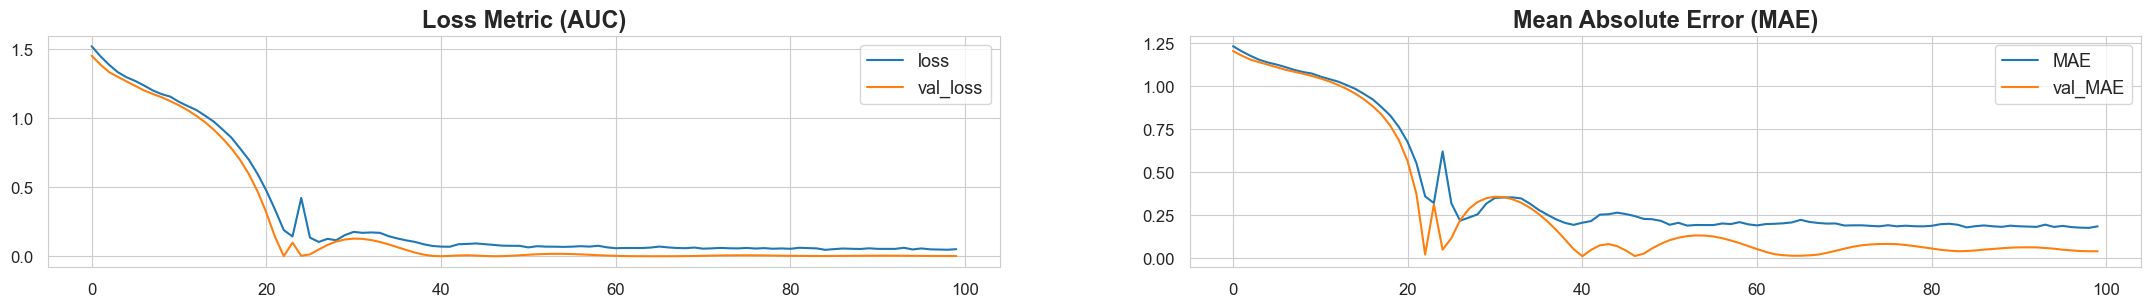

In [22]:
plt.figure(figsize = (27, 3))

plt.subplot(121)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.title("Loss Metric (AUC)")
plt.legend()

plt.subplot(122)
plt.plot(history.history["MAE"], label = "MAE")
plt.plot(history.history["val_MAE"], label = "val_MAE")

plt.title("Mean Absolute Error (MAE)")
plt.legend()
plt.show()

In [23]:
# let's see the prediction of the own data and plot it against the actual
y_predicted = model.predict(x_train).reshape(1, -1)[0]

21/21 [==============================] - 6s 262ms/step


In [29]:
# so we can calculate the mae and rmse loss for the model as:
MAE(y_train.reshape(1, -1)[0], y_predicted), MSE(y_train.reshape(1, -1)[0], y_predicted, squared = False)

(0.0370409595279053, 0.04263899569731256)

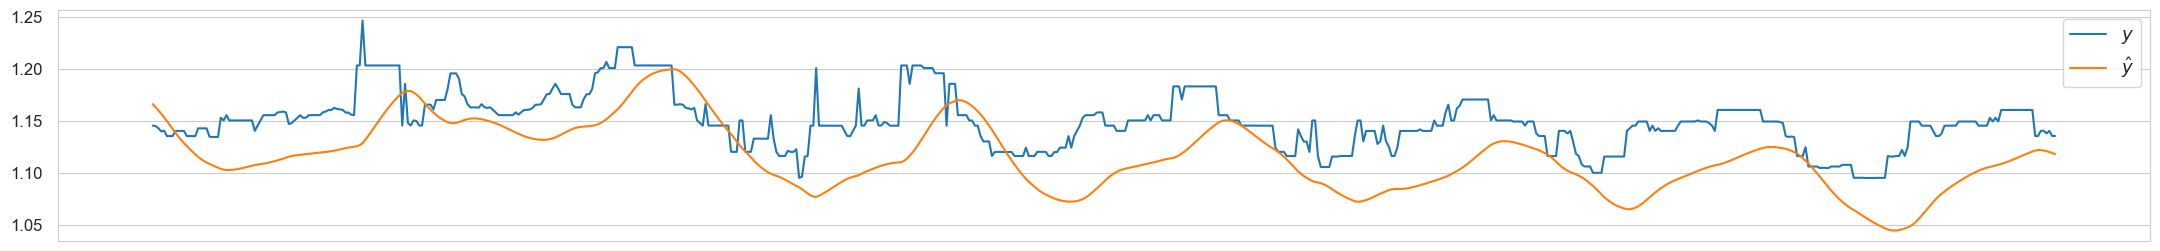

In [31]:
plt.figure(figsize = (27, 3))

plt.plot(y_train.reshape(1, -1)[0], label = "$y$")
plt.plot(y_predicted, label = "$\hat{y}$")

plt.xticks([]) # close for now

plt.legend()
plt.show()